# Assignment 2.5 - CNN Real Data Recognition - MNIST (Handwriting)

### The Following Script Contains:
#### 1. Importing Libraries and Data
#### 2. Training CNN on MNIST Data Set
#### 3. Loading and Pre-processing of Handwritten Data
#### 4. Testing Real Data

### 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from numpy import unique
from numpy import reshape
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation
from keras.layers import Conv1D, Conv2D, Dense, Dropout, BatchNormalization, Flatten, MaxPooling2D, Activation
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from numpy import argmax
from PIL import Image
from numpy import asarray

In [2]:
tf.random.set_seed(42)

In [3]:
hand= mnist.load_data()

In [4]:
hand[0]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

### 2. Training CNN on MNIST Data Set

In [5]:
(X_train, y_train), (X_test, y_test) = hand

In [6]:
np.set_printoptions(edgeitems=3)
np.core.arrayprint._line_width = 180000

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

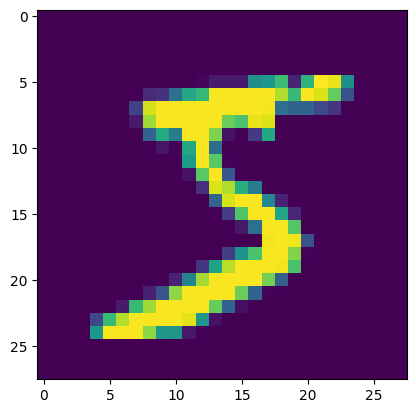

In [10]:
plt.imshow(X_train[0])

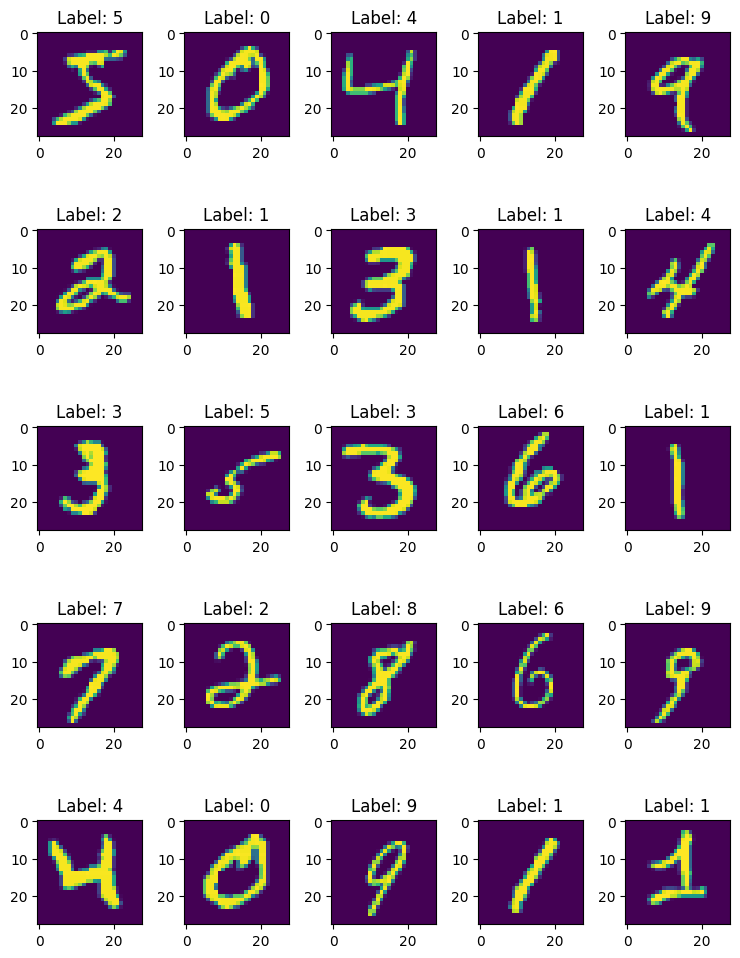

In [11]:
num = 25
images = X_train[:num]
labels = y_train[:num]

num_row = 5
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i])#, cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [12]:
# Preprocess input data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [13]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [14]:
X_train /= 255
X_test /= 255

In [15]:
# Preprocess class labels
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

In [16]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [17]:
for label in range(10):
    one_hot = (Y_train[label]).astype(np.int32)
    print("label: ", label, " in one-hot representation: ", one_hot)

label:  0  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label:  1  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label:  2  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label:  3  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  4  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]
label:  5  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label:  6  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  7  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label:  8  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  9  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]


In [18]:
epochs = 30
batch_size = 16
n_hidden = 32

#timesteps = len(X_train[0])
#input_dim = len(X_train[0][0])
#n_classes = _count_classes(Y_train)

# Define model architecture
model = Sequential()
 
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
 
# 8. Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\kenzy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# Fit model on training data
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8766 - loss: 0.3808
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9740 - loss: 0.0885
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9798 - loss: 0.0685
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9837 - loss: 0.0516
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9866 - loss: 0.0437
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9879 - loss: 0.0415
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9876 - loss: 0.0401
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9897 - loss: 0.0328
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9906 - loss: 0.0299
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9912 - loss: 0.0285


In [20]:
# Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=2)

313/313 - 1s - 3ms/step - accuracy: 0.9905 - loss: 0.0340


In [21]:
#predict first 4 images in the test set
model.predict(X_test[:4])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[6.92473734e-16, 5.36571204e-11, 8.88556034e-11, 1.01096423e-11,
        3.57443872e-14, 1.36993360e-15, 1.40187223e-19, 1.00000000e+00,
        5.45787321e-16, 1.03098474e-10],
       [1.77393105e-12, 4.89619872e-11, 1.00000000e+00, 5.10687980e-15,
        1.41690580e-17, 9.79910710e-23, 4.50386688e-15, 6.20864689e-15,
        3.24279748e-17, 6.45242467e-23],
       [1.32180855e-12, 9.99999881e-01, 4.17833812e-09, 5.50573129e-11,
        4.88805796e-09, 2.09376252e-10, 4.16004031e-09, 8.19128658e-08,
        8.27289237e-10, 1.34411831e-11],
       [9.99973416e-01, 2.09871889e-08, 1.45816830e-06, 7.23933802e-09,
        3.37165069e-08, 4.96634641e-07, 2.03108102e-05, 3.59915020e-06,
        5.21768186e-07, 1.52130639e-07]], dtype=float32)

In [22]:
sumarray = np.sum(model.predict(X_test[:4]), axis=1)
sumarray

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([1., 1., 1., 1.], dtype=float32)

In [23]:
#actual results for first 4 images in test set
y_test[:4]

array([7, 2, 1, 0], dtype=uint8)

In [24]:
test_predictions = model.predict(X_test)
cm = confusion_matrix(y_test, np.argmax(test_predictions,axis=1))
print(cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[ 975    0    1    1    0    0    2    0    1    0]
 [   0 1132    0    1    0    0    1    1    0    0]
 [   1    0 1026    0    0    0    0    5    0    0]
 [   0    0    3 1005    0    1    0    0    1    0]
 [   1    0    1    0  971    0    0    1    3    5]
 [   1    0    0    7    0  882    1    0    1    0]
 [   4    3    1    0    1    4  943    0    2    0]
 [   0    1    5    3    0    0    0 1018    1    0]
 [   4    1    2    2    0    0    0    2  962    1]
 [   3    0    0    2    4    1    0    3    5  991]]


### 3. Loading and Pre-processing of Handwritten Data

In [25]:
# Create a path for importing
path = r'C:\Users\kenzy\OneDrive\Desktop\Data Analytics Course 2.0\Basics of Machine Learning for Analysts\10-2024 ClimateWins'

In [45]:
img = Image.open(os.path.join(path, '06 Learning', 'MNIST Numbers', '0 - inverse.jpg'))
print(img.format)
print(img.size)
print(img.mode)

JPEG
(142, 120)
L


In [46]:
newsize = (28,28)
img2 = img.resize(newsize)
img2

In [47]:
testimg = asarray(img2)

In [48]:
print(testimg.shape)

(28, 28)


In [49]:
testimg = testimg.reshape(1, 28, 28, 1)

In [50]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
3


### The model failed to recognize a 0 and instead recognized it as a 3

In [52]:
# test with more numbers
img = Image.open(os.path.join(path,'06 Learning', 'MNIST Numbers', '1 - inverse.jpg'))
print(img.format)
print(img.size)
print(img.mode)

JPEG
(122, 131)
L


In [53]:
newsize = (28,28)
img1 = img.resize(newsize)
img1

In [54]:
testimg = asarray(img1)

In [55]:
print(testimg.shape)

(28, 28)


In [56]:
testimg = testimg.reshape(1, 28, 28, 1)

In [57]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1


In [58]:
# test with more numbers
img = Image.open(os.path.join(path,'06 Learning', 'MNIST Numbers', '2 - inverse.jpg'))
print(img.format)
print(img.size)
print(img.mode)

JPEG
(142, 112)
L


In [59]:
newsize = (28,28)
img2 = img.resize(newsize)
img2

In [60]:
testimg = asarray(img2)

In [61]:
print(testimg.shape)

(28, 28)


In [62]:
testimg = testimg.reshape(1, 28, 28, 1)

In [63]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2


In [64]:
# test with more numbers
img = Image.open(os.path.join(path,'06 Learning', 'MNIST Numbers', '3 - inverse.jpg'))
print(img.format)
print(img.size)
print(img.mode)

JPEG
(148, 129)
L


In [65]:
newsize = (28,28)
img3 = img.resize(newsize)
img3

In [66]:
testimg = asarray(img3)

In [67]:
print(testimg.shape)

(28, 28)


In [68]:
testimg = testimg.reshape(1, 28, 28, 1)

In [69]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
3


In [70]:
# test with more numbers
img = Image.open(os.path.join(path,'06 Learning', 'MNIST Numbers', '4 - inverse.jpg'))
print(img.format)
print(img.size)
print(img.mode)

JPEG
(120, 124)
L


In [71]:
newsize = (28,28)
img4 = img.resize(newsize)
img4

In [72]:
testimg = asarray(img4)

In [73]:
print(testimg.shape)

(28, 28)


In [74]:
testimg = testimg.reshape(1, 28, 28, 1)

In [75]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
4


In [76]:
# test with more numbers
img = Image.open(os.path.join(path,'06 Learning', 'MNIST Numbers', '5 - inverse.jpg'))
print(img.format)
print(img.size)
print(img.mode)

JPEG
(140, 138)
L


In [77]:
newsize = (28,28)
img5 = img.resize(newsize)
img5

In [78]:
testimg = asarray(img5)

In [79]:
print(testimg.shape)

(28, 28)


In [80]:
testimg = testimg.reshape(1, 28, 28, 1)

In [81]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
5


In [82]:
# test with more numbers
img = Image.open(os.path.join(path,'06 Learning', 'MNIST Numbers', '6 - inverse.jpg'))
print(img.format)
print(img.size)
print(img.mode)

JPEG
(109, 125)
L


In [83]:
newsize = (28,28)
img6 = img.resize(newsize)
img6

In [84]:
testimg = asarray(img6)

In [86]:
print(testimg.shape)

(28, 28)


In [87]:
testimg = testimg.reshape(1, 28, 28, 1)

In [88]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
6


In [89]:
# test with more numbers
img = Image.open(os.path.join(path,'06 Learning', 'MNIST Numbers', '7 - inverse.jpg'))
print(img.format)
print(img.size)
print(img.mode)

JPEG
(133, 122)
L


In [90]:
newsize = (28,28)
img7 = img.resize(newsize)
img7

In [91]:
testimg = asarray(img7)

In [92]:
print(testimg.shape)

(28, 28)


In [93]:
testimg = testimg.reshape(1, 28, 28, 1)

In [94]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
7


In [99]:
# test with more numbers
img = Image.open(os.path.join(path,'06 Learning', 'MNIST Numbers', '8 - inverse.jpg'))
print(img.format)
print(img.size)
print(img.mode)

JPEG
(111, 135)
L


In [100]:
newsize = (28,28)
img8 = img.resize(newsize)
img8

In [101]:
testimg = asarray(img8)

In [102]:
testimg = testimg.reshape(1, 28, 28, 1)

In [103]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
8


In [104]:
# test with more numbers
img = Image.open(os.path.join(path,'06 Learning', 'MNIST Numbers', '9 - inverse.jpg'))
print(img.format)
print(img.size)
print(img.mode)

JPEG
(109, 124)
L


In [105]:
newsize = (28,28)
img9 = img.resize(newsize)
img9

In [106]:
testimg = asarray(img9)

In [107]:
print(testimg.shape)

(28, 28)


In [108]:
testimg = testimg.reshape(1, 28, 28, 1)

In [109]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
9
